In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import messagebox
 

In [2]:
def plot_ocv():
    try:
        # Get user inputs
        max_voltage = float(entry_voltage.get())
        temperature = float(entry_temp.get())
        
        a0 = 3 # OCV at SOC = 0
        a1 = (max_voltage - a0) 
        a2 = -0.5 
        b0 = 0.0  
        b1 = 0.01  
 
        #SOC range  
        SOC = np.linspace(0, 1, 100)  
 
        #OCV Equation
        OCV = (a0 + a1 * SOC + a2 * SOC**2) + (b0 + b1 * (temperature - 25))
 
        #plot
        fig, ax = plt.subplots(figsize=(8, 5))
        ax.plot(SOC * 100, OCV, label=f'Temperature = {temperature}°C', color='b')
        ax.set_title('Open-Circuit Voltage (OCV) vs State of Charge (SOC)')
        ax.set_xlabel('State of Charge (SOC) [%]')
        ax.set_ylabel('Open-Circuit Voltage (OCV) [V]')
        ax.grid(True)
        ax.legend()
        ax.set_xlim(0, 100)
        ax.set_ylim(min(OCV), max(OCV))
 
    
        canvas = FigureCanvasTkAgg(fig, master=window)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numeric values.")
 

In [3]:
def plot_bar_chart():
    try:
        # Predefined SOC and OCV (assemption) ,
        
        SOC_values = np.array([0, 0.25, 0.5, 0.75, 1])  
        OCV_values = np.array([2.84, 3.2, 3.6, 4.0, 4.2])  

        #Input for specific SOC
        user_soc = float(entry_soc.get())
        
        if user_soc < 0 or user_soc > 1:
            raise ValueError("SOC value must be between 0 and 1.")

        # Interpolation of the data from soc and ocv map 
        closest_ocv = np.interp(user_soc, SOC_values, OCV_values)

        
        fig, ax = plt.subplots(figsize=(8, 5))
        bars = ax.bar(['Specified SOC'], [closest_ocv], color='b')

        
        for bar in bars:
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                    f'{closest_ocv:.2f} V', ha='center', va='bottom')

        ax.set_ylim(min(OCV_values) - 0.5, max(OCV_values) + 0.5)
        ax.set_ylabel('Open-Circuit Voltage (OCV) [V]')
        ax.set_title(f'OCV at SOC = {user_soc * 100:.1f}%')
        
       
        canvas = FigureCanvasTkAgg(fig, master=window)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    except ValueError as e:
        messagebox.showerror("Input Error", str(e))


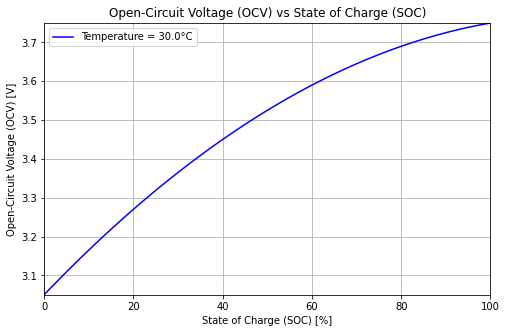

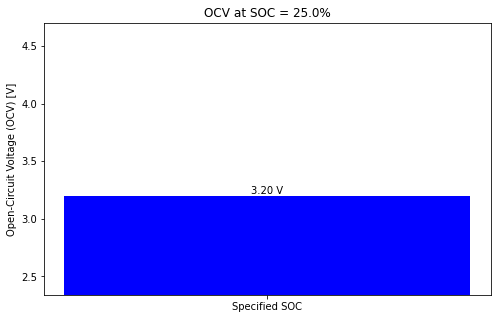

In [4]:
# The GUI/ Dashboard is created through tkinter 

window = tk.Tk()
window.title("OCV Graph Generator")


label_voltage = tk.Label(window, text="Enter Maximum Voltage (V):")
label_voltage.pack()

entry_voltage = tk.Entry(window)
entry_voltage.pack()

label_temp = tk.Label(window, text="Enter Temperature (°C):")
label_temp.pack()

entry_temp = tk.Entry(window)
entry_temp.pack()


plot_button = tk.Button(window, text="Plot OCV Graph", command=plot_ocv)
plot_button.pack()


label_soc = tk.Label(window, text="Enter SOC to find corresponding OCV (0 to 1):")
label_soc.pack()

entry_soc = tk.Entry(window)
entry_soc.pack()


bar_chart_button = tk.Button(window, text="Show OCV as Bar Chart", command=plot_bar_chart)
bar_chart_button.pack()

# Start the Tkinter event loop
window.mainloop()